# Import and Clean Data

In [1]:
import pandas as pd
import emoji 
import numpy as np
import matplotlib.pyplot as plt
import nltk

# Read data from file without header
chat = pd.read_table('/Users/mj/Downloads/_chat.txt', header=None)
#chat.head(50)

In [2]:
chat.describe()

,0
count,21303
unique,20794
top,We’ll talk later
freq,15


In [3]:
print(chat.dtypes)

0    object
dtype: object


In [4]:
# Adding column headers
chat.columns = ['raw_data']


In [5]:
#  using regular expressions to extract the data
chat[['datetime', 'person', 'message']] = chat['raw_data'].str.extract(r'\[(.*?)\].*?([^\s:]+): (.*)')

# Display result
#print(chat[['datetime', 'person', 'message']])

In [6]:
#chat.head(50)

In [7]:
#In the chat, there were some messages hanging, (the person used the next line)
#Change the hanging messages and merge them appropriately to the person
import numpy as np

def fill_missing_dates(chat):
    # Iterate through the DataFrame
    for index, row in chat.iterrows():
        # Check if 'datetime' is NaN
        if pd.isna(row['datetime']):
            # Fill NaN in 'datetime' with the previous row's value
            chat.at[index, 'datetime'] = chat.at[index - 1, 'datetime']
            # Fill NaN in 'person' with the previous row's value
            chat.at[index, 'person'] = chat.at[index - 1, 'person']
            # Fill NaN in 'message' with the value from 'raw_data'
            chat.at[index, 'message'] = chat.at[index, 'raw_data']
    return chat


chat_filled = fill_missing_dates(chat)
#print(chat_filled[['datetime', 'person', 'message']])

In [8]:

#Check data
#chat.head(50)

# Emoji Analysis
checks for emojis,counts and visualize results

In [9]:
#use the right emoji version so you can be able to use "UNICODE_EMOJI"
print(emoji.__version__) 

0.4.5


In [10]:


def count_emojis(text):
  """Extracts emojis from the text and returns their count."""
  emojis = ''.join(c for c in text if c in emoji.UNICODE_EMOJI)
  return len(emojis)




/Users/mj/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mj/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127770 (\N{NEW MOON WITH FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mj/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127998 (\N{EMOJI MODIFIER FITZPATRICK TYPE-5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


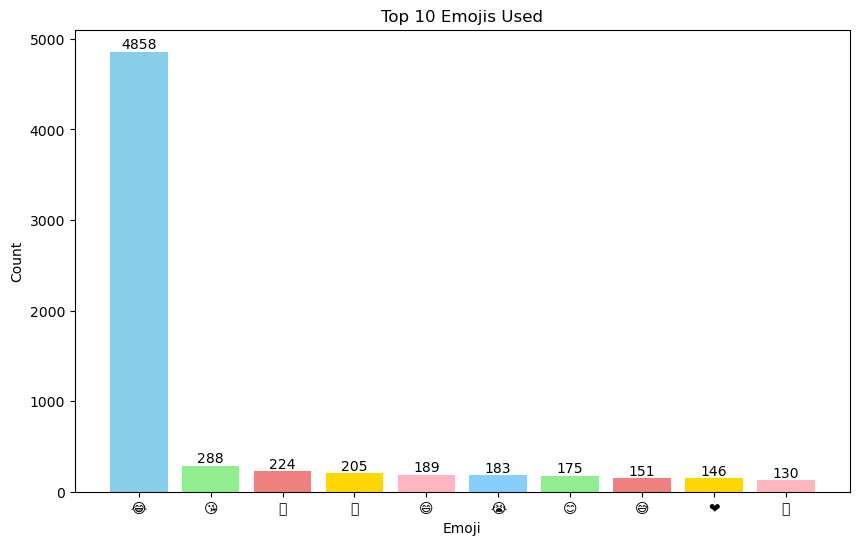

In [11]:



def count_emojis(text):
    # Extract emojis from the text
    emojis = ''.join(c for c in text if c in emoji.UNICODE_EMOJI)
    return emojis

chat['emojis'] = chat['message'].apply(count_emojis)

# Flatten the list of emojis
flat_emojis = [emoji for sublist in chat['emojis'].tolist() for emoji in sublist]

# Create a DataFrame to count the occurrences of each emoji
emoji_counts = pd.DataFrame(flat_emojis, columns=['emoji']).value_counts().reset_index(name='count')

# Plot the top N emojis with colors and data labels
top_n = 10  
top_emojis = emoji_counts.head(top_n)

# Set color for each emoji (you can customize the colors)
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink', 'lightskyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink']

plt.figure(figsize=(10, 6))
bars = plt.bar(top_emojis['emoji'], top_emojis['count'], color=colors)
plt.xlabel('Emoji')
plt.ylabel('Count')
plt.title(f'Top {top_n} Emojis Used')

# Add data labels to each bar
for bar, label in zip(bars, top_emojis['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), label, ha='center', va='bottom')

plt.show()
#Some emojis could not be plotted


# Check text habits

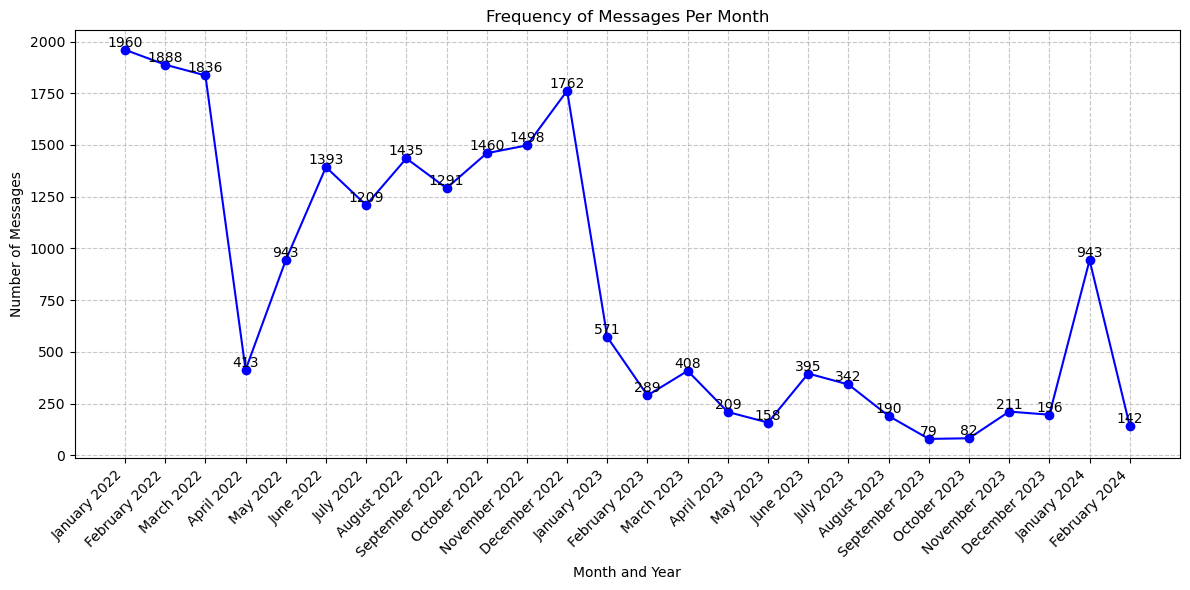

In [12]:
import calendar

# Convert 'datetime' to datetime format
chat['datetime'] = pd.to_datetime(chat['datetime'], format='%d/%m/%Y, %I:%M:%S %p')

# Extract month and year from 'datetime'
chat['month_year'] = chat['datetime'].dt.to_period('M')

# Count the frequency of messages per month
monthly_counts = chat['month_year'].value_counts().sort_index()

# Convert period index to month names
monthly_counts.index = monthly_counts.index.strftime('%B %Y')

# Plot the line graph with data labels and grid lines
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Month and Year')
plt.ylabel('Number of Messages')
plt.title('Frequency of Messages Per Month')
plt.xticks(rotation=45, ha='right')

# Add data labels
for i, count in enumerate(monthly_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

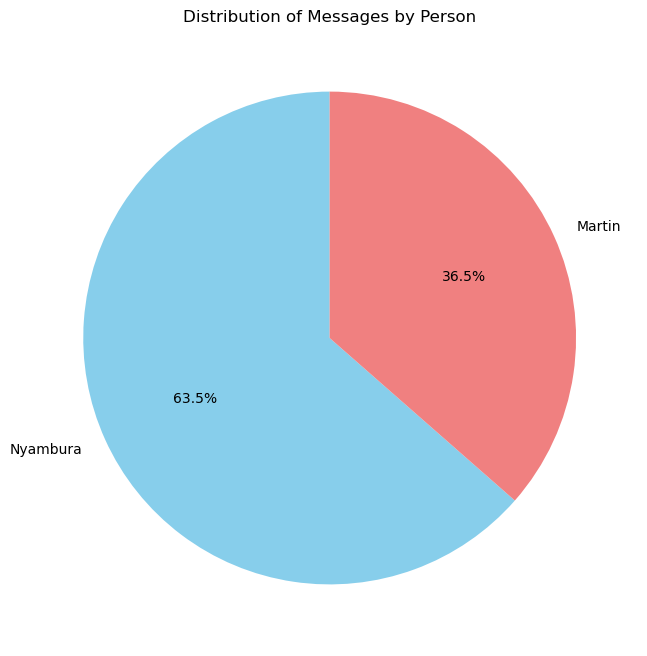

In [13]:
#Count the number of values each person has 
person_counts = chat['person'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(person_counts, labels=person_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Messages by Person')
plt.show()

In [14]:
# Convert 'datetime' to datetime format
#chat['datetime'] = pd.to_datetime(chat['datetime'], format='%m/%d/%Y, %I:%M:%S %p')

# Extract date from datetime
chat['date'] = chat['datetime'].dt.date

# Find the minimum and maximum dates
min_date = chat['date'].min()
max_date = chat['date'].max()

# Generate a date range between the minimum and maximum dates
date_range = pd.date_range(min_date, max_date, freq='D')

# Find unique dates with no messages
existing_dates = chat['date'].unique()
missing_dates = set(date_range.date) - set(existing_dates)

# Count distinct dates without messages
distinct_days_without_messages = len(missing_dates)

# Total count of days in between min and max range
total_days_in_range = len(date_range)

# Display the results
print(f"Count of distinct days without messages: {distinct_days_without_messages}")
print(f"Total count of days in between min and max range: {total_days_in_range}")

Count of distinct days without messages: 154
Total count of days in between min and max range: 756


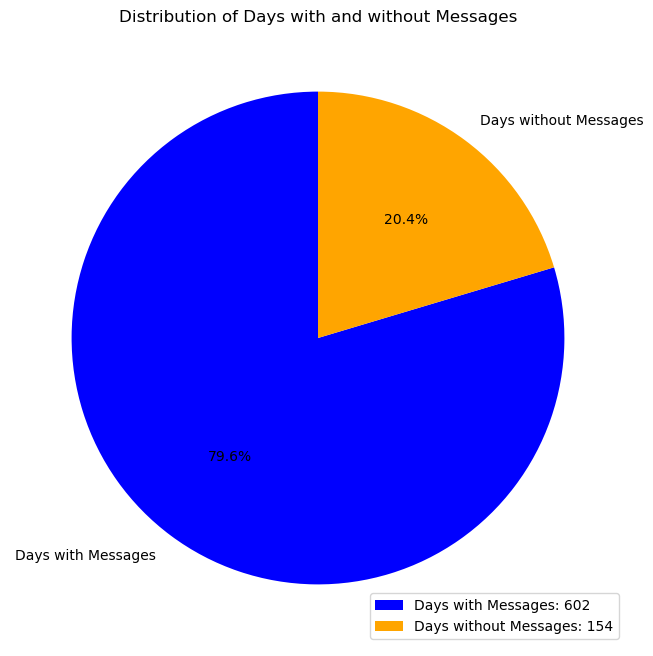

In [15]:

#chat['datetime'] = pd.to_datetime(chat['datetime'], format='%m/%d/%Y, %I:%M:%S %p')

# Extract date from datetime
#chat['date'] = chat['datetime'].dt.date

# Find the minimum and maximum dates
min_date = chat['date'].min()
max_date = chat['date'].max()

# Generate a date range between the minimum and maximum dates
date_range = pd.date_range(min_date, max_date, freq='D')

# Find unique dates with no messages
existing_dates = chat['date'].unique()
missing_dates = set(date_range.date) - set(existing_dates)

# Count distinct dates without messages
distinct_days_without_messages = len(missing_dates)

# Total count of days in between min and max range
total_days_in_range = len(date_range)

# Count of days with messages
days_with_messages = total_days_in_range - distinct_days_without_messages

# Create a DataFrame for visualization
data = {
    'Category': ['Days with Messages', 'Days without Messages'],
    'Count': [days_with_messages,distinct_days_without_messages]
}

count_df = pd.DataFrame(data)

# Plot the pie chart with data labels and multiple legends
plt.figure(figsize=(8, 8))
plt.pie(count_df['Count'], labels=count_df['Category'], autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)
plt.title('Distribution of Days with and without Messages')

# Add multiple legends
plt.legend([ 'Days with Messages: {}'.format(days_with_messages),
            'Days without Messages: {}'.format(distinct_days_without_messages)], loc='lower right')

plt.show()








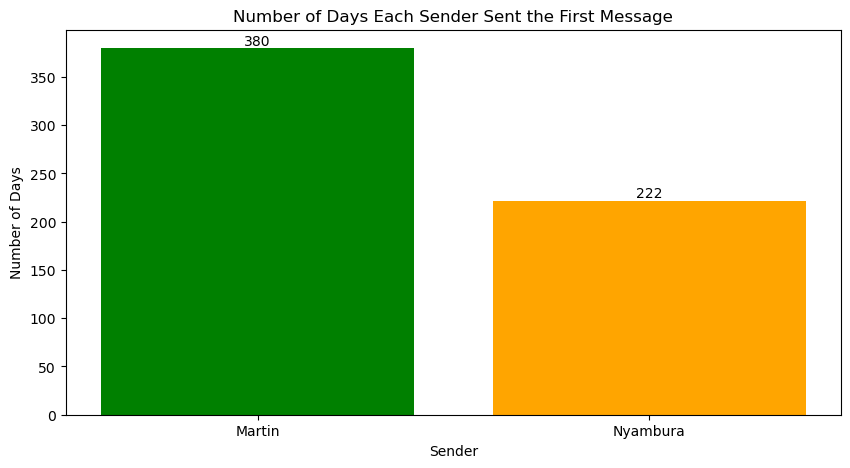

In [16]:

#chat['datetime'] = pd.to_datetime(chat['datetime'], format='%m/%d/%Y, %I:%M:%S %p')

# Extract date from datetime
#chat['date'] = chat['datetime'].dt.date

def find_first_sender(df):
    first_message = df.loc[df['datetime'].idxmin()]
    return first_message['person']

# Group by date and find the first sender
first_senders = chat.groupby('date').apply(find_first_sender).reset_index(name='first_sender')

# Count occurrences
sender_counts = first_senders['first_sender'].value_counts()

# Plot the bar chart with data labels
plt.figure(figsize=(10, 5))
bars = plt.bar(sender_counts.index, sender_counts, color=['green', 'orange'])

plt.xlabel('Sender')
plt.ylabel('Number of Days')
plt.title('Number of Days Each Sender Sent the First Message')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()



In [17]:
from textblob import TextBlob
from langdetect import detect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



messages = chat['message']

#function to get sentiment polarity for English words
def get_sentiment_polarity(text):
    # Detect language using langdetect
    try:
        language = detect(text)
        if language == 'en':
            # Remove stopwords
            stop_words = set(stopwords.words('english'))
            words = word_tokenize(text)
            filtered_text = [word for word in words if word.lower() not in stop_words]
            
            # Analyze sentiment
            analysis = TextBlob(" ".join(filtered_text))
            return analysis.sentiment.polarity
        else:
            return "Language detection failed"  
    except:
        return "Language detection failed"  # Return language detection failure message

# Apply the function to each message and create a new column
chat['sentiment_polarity'] = messages.apply(get_sentiment_polarity)

# Filter out language detection failures
chat = chat[chat['sentiment_polarity'] != "Language detection failed"].copy()  

#function to categorize sentiment
def categorize_sentiment(polarity):
    if isinstance(polarity, float):
        if polarity > 0:
            return 'Positive'
        elif polarity < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Language detection failed'

#function to create a 'sentiment' column
chat['sentiment'] = chat['sentiment_polarity'].apply(categorize_sentiment)

# Display the dominant sentiment
dominant_sentiment = chat['sentiment'].value_counts().idxmax()
print(f"Dominant Sentiment: {dominant_sentiment}")

Dominant Sentiment: Neutral


     Word  Count
0    miss     36
1     God     78
2  thanks     94


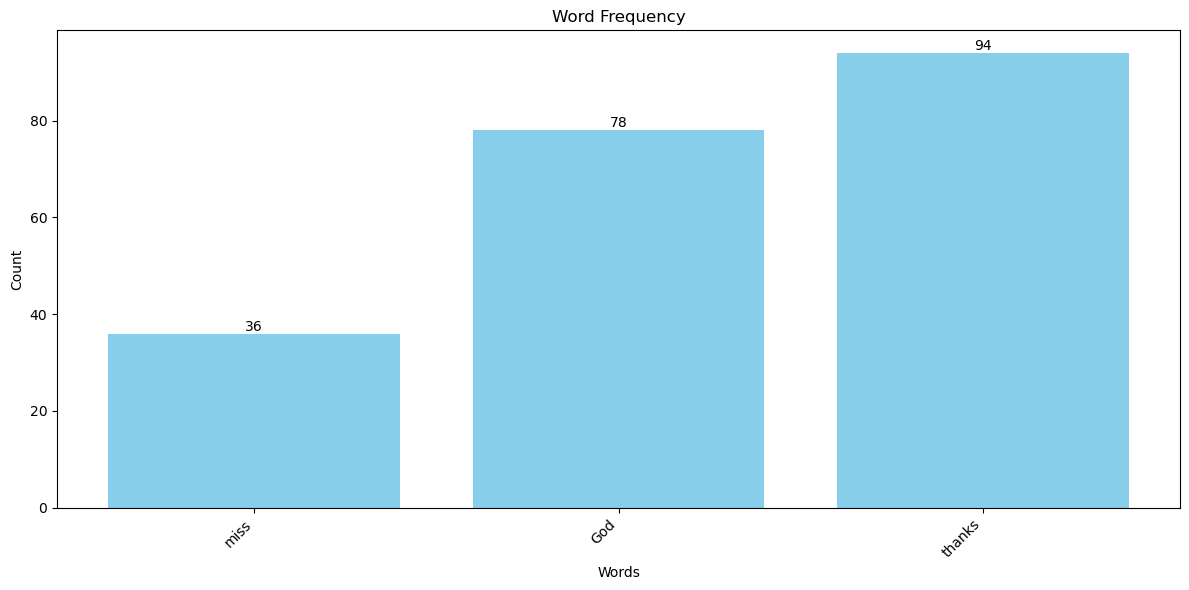

In [18]:
# Check frequency for specific words
miss_count = chat['message'].str.lower().str.count('miss ').sum()
#lv_count = chat['message'].str.lower().str.count('love').sum()
gd_count = chat['message'].str.lower().str.count(r'\bgod\b').sum()
#th_count = chat['message'].str.lower().str.count(r'\bthank\b').sum()
th_count = chat['message'].str.lower().str.count('thank').sum()


# Create a DataFrame with the word counts
word_counts_df = pd.DataFrame({
    'Word': ['miss', 'God', 'thanks'],
    'Count': [miss_count, gd_count, th_count]
})

# Display the DataFrame
print(word_counts_df)

# Plot the bar chart with data labels
plt.figure(figsize=(12, 6))
bars = plt.bar(word_counts_df['Word'], word_counts_df['Count'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Word Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [19]:
#Check for messages with specific words
#thanks_messages = chat[chat['message'].str.contains(r'\bthank')]

# Display the messages containing words starting with "thanks"
#for message in thanks_messages['message']:
    #print(message)

# Check Common Words

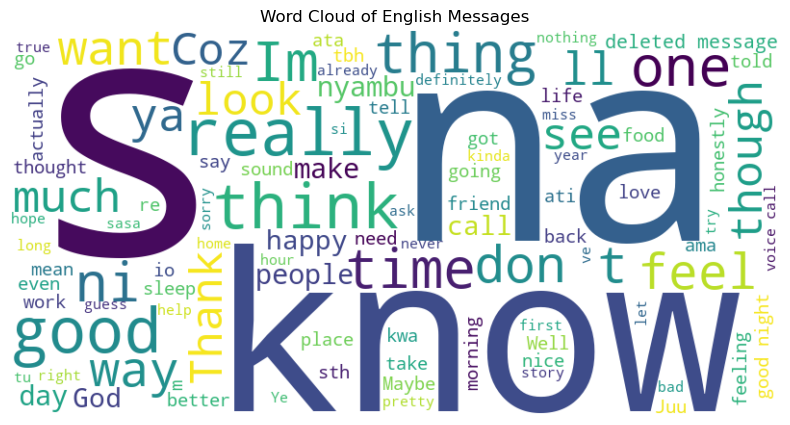

In [22]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

all_messages = ' '.join(chat['message'].astype(str))

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_messages = ' '.join([word for word in all_messages.split() if word.lower() not in stop_words]) 

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(filtered_messages)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of English Messages')
plt.show()


Check Sentiment distribution

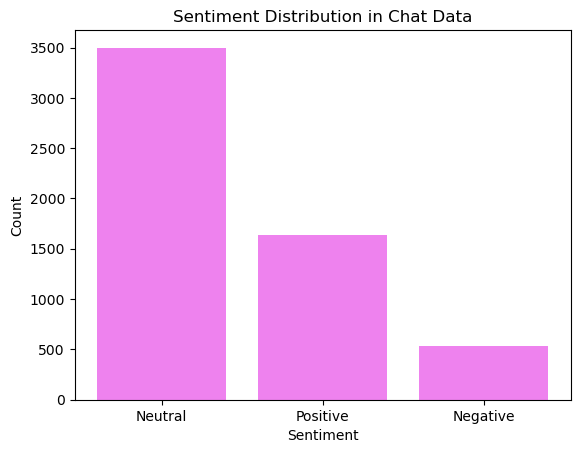

In [21]:
# Count sentiment frequencies
sentiment_counts = chat['sentiment'].value_counts()

# Create a bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values,color='violet')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution in Chat Data")
plt.show()